In [166]:
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'size'   : 20}
rc('font', **font)

from igraph import *
from COVID_19 import *

# Rott Mean Square Displacement

In [ ]:
data=pd.read_csv('/home/alex/Matteo_S/CoronaVirus/Puebla_DCT/msrd/daily_rmsd.csv')
data=data.sort_values(by=['date'])
cases=pd.read_csv('/home/alex/Matteo_S/CoronaVirus/Puebla_DCT/files/Cases.csv')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)


plt.plot([str(i)[5:] for i in data['date']],np.divide(data['rmsd'],np.max(data['rmsd'])),'-o',label='RMSD')
plt.plot([str(i)[5:] for i in data['date']],np.divide(cases['cases'][0:84],np.max(cases['cases'][0:84])),label='Cumulative cases')

plt.ylabel(r'$RMSD$',fontsize=20,fontweight='bold')
plt.xlabel(r'$days$',fontsize=20,fontweight='bold')


plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})


ax.tick_params( length=5, width=1, grid_alpha=0.2)


# plt.savefig(path+'Normilized_RMSDvsCC.svg',bbox_inches='tight')
# plt.savefig(path+'Normilized_RMSDvsCC.pdf',bbox_inches='tight')
#plt.yscale('log')
plt.show()


# Attack


In [15]:
#Be careful with the path
path='/home/alex/Matteo_S/CoronaVirus/Test_library/'
g=Graph.Read_GML(path+'contact_networks/gc_26.gml')
print(summary(g))

IGRAPH U--- 1750 2778 -- 
+ attr: id (v), ids (v), layer (v)
None


In [18]:
# Here we call the class Percolation. For big network we suggest to run 
# this in the background.
x,y=[],[]
att = COVID_19.Percolation(g,radius=2)  
for ii,i in enumerate(['random','degree','KC+HB','CI','betweeness']):
    G,q=att.percolation(mode=i)
    x.append(q)
    y.append(G)

No GCC
No GCC
No GCC
No GCC
No GCC


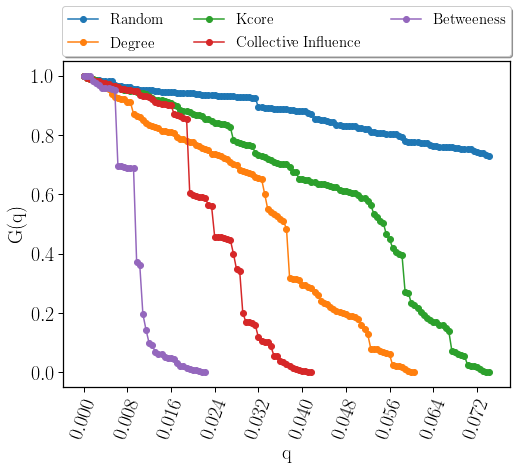

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)
    
labels=['Random','Degree','Kcore','Collective Influence','Betweeness']
for i in range(len(x)):
    if i==0:
        plt.plot(np.divide(x[i][0:len(x[2])],len(g.degree())),y[i][0:len(x[2])],'-o',label=labels[i])
    else:
        plt.plot(np.divide(x[i],len(g.degree())),y[i],'-o',label=labels[i])


plt.ylabel('G(q)',fontsize=20,fontweight='bold')
plt.xlabel('q',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(11)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.19), shadow=True, ncol=3, prop={'size': 15})

ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/Strategies_comparison_26.pdf',bbox_inches='tight')
plt.show()

# Window analyses

In [167]:
#mse
path='/home/alex/Matteo_S/CoronaVirus/Test_library/'
mrsd=pd.read_csv(path+'other_files/rms_daily.csv')
mrsd=mrsd.sort_values(by=['date'])
#cumulative cases
cases=pd.read_csv(path+'other_files/daily_cases_Fortaleza.txt')
cumulative_cases=list(np.cumsum(cases['daily_cases']))
#Statistis result
data=np.load(path+'simulations_results/G_Statistic.npy',allow_pickle=True)
#Change output shape. 
Data=[]
for ii,i in enumerate(data):
    for j,jj in enumerate(i):
        if ii==0:
            Data.append([])
        Data[j].append(jj)

In [168]:
#We assign the date on the right side of the widow. Since 
#for this example window=7 than we start from March 7
week=[]
dt=date(2020,3,7)
final=date(2020,5,7)
while dt <= final:
    week.append(pd.Timestamp(dt))
    dt=dt+timedelta(days=2)

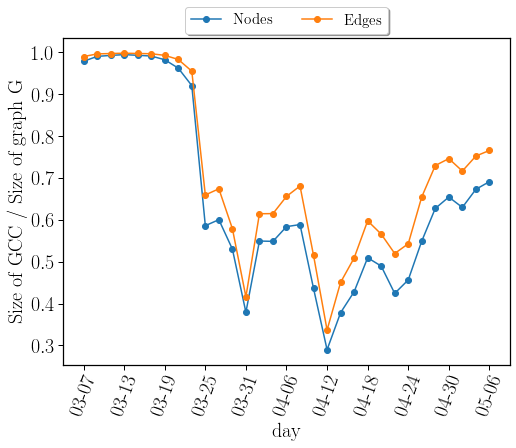

In [169]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:-9] for i in week],np.divide(Data[3],Data[0]),'-o',label='Nodes')
plt.plot([str(i)[5:-9] for i in week],np.divide(Data[4],Data[1]),'-o',label='Edges')

plt.ylabel('Size of GCC / Size of graph G',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(13)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})

ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/Normalized_GCC.pdf',bbox_inches='tight')

plt.show()

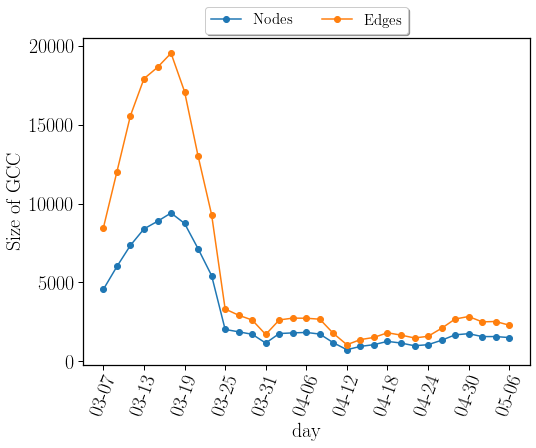

In [170]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)
    
plt.plot([str(i)[5:-9] for i in week],np.divide(Data[3],1),'-o',label='Nodes')
plt.plot([str(i)[5:-9] for i in week],np.divide(Data[4],1),'-o',label='Edges')

plt.ylabel('Size of GCC',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})

ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/GCC.pdf',bbox_inches='tight')

plt.show()


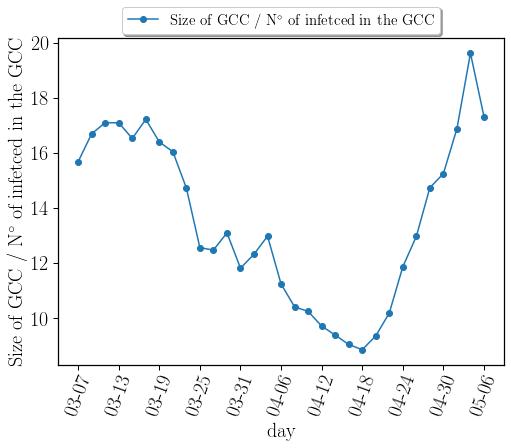

In [171]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:-9] for i in week],np.divide(Data[3],Data[5]),'-o',label='Size of GCC / N$^\circ$ of infetced in the GCC')

plt.ylabel('Size of GCC / N$^\circ$ of infetced in the GCC',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')


plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/GCC_infectious.pdf',bbox_inches='tight')

plt.show()

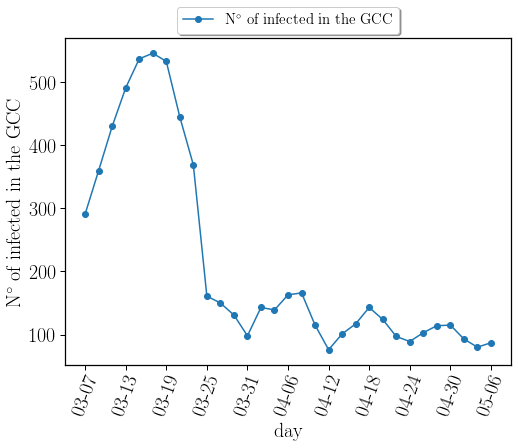

In [172]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:-9] for i in week],Data[5],'-o',label='N$^\circ$ of infected in the GCC')

plt.ylabel('N$^\circ$ of infected in the GCC',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})

ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/Infectious_in_GCC.pdf',bbox_inches='tight')

plt.show()

In [173]:
#From kshell to k-core
kc_all=Data[6]
kc_all_si=Data[7]   
kcore_all=[]
for i in kc_all_si:
    x=[]
    for j in range(len(i)):
         x.append(np.sum(i[j:]))
    kcore_all.append(x)

In [174]:
#Kcore max
kmax_s,kmax_i=[],[]
for ii,i in enumerate(kcore_all):
    kmax_s.append(i[np.where(kc_all[ii]==np.max(kc_all[ii]))[0][0]])
    kmax_i.append(np.max(kc_all[ii]))

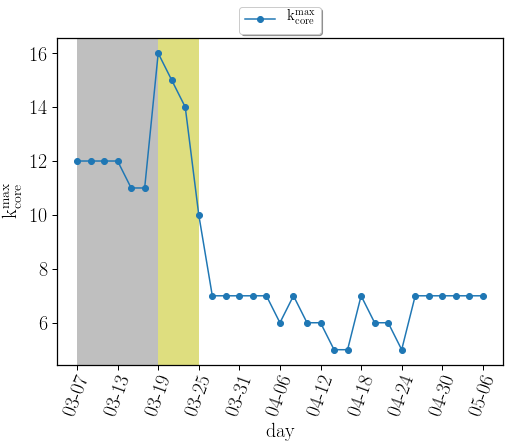

In [175]:
#plot
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:-9] for i in week], kmax_i,'o-',label=r'k$_{\rm core}^{\rm max}$')

plt.ylabel(r'k$_{\rm core}^{\rm max}$',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')

plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)


plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/Max_kcore_index.pdf',bbox_inches='tight')

plt.show()

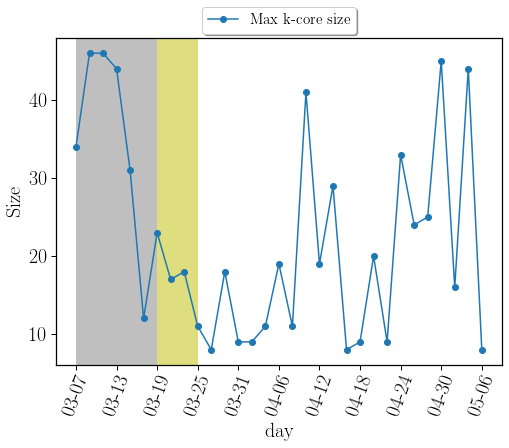

In [176]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:-9] for i in week], kmax_s,'o-',label='Max k-core size')

plt.ylabel('Size',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')
plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)


plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/Max_kcore_size.pdf',bbox_inches='tight')

plt.show()

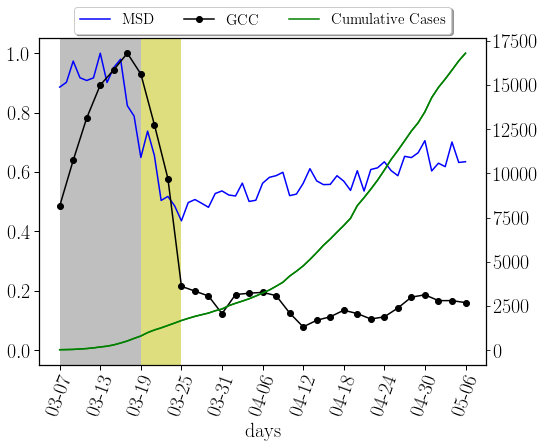

In [177]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:] for i in mrsd['date'][6:]],mrsd['rms'][6:]/np.max(mrsd['rms'][6:]),'-',label='MSD',
        color='b')
plt.plot([str(i)[5:-9] for i in week],Data[3]/np.max(Data[3]),'o-',label='GCC',
        color='k')
plt.plot([str(i)[5:] for i in  mrsd['date'][6:]],cumulative_cases[6:67]/np.max(cumulative_cases[6:67]),'-',color='g', 
         label='Cumulative Cases')


plt.xlabel('days',fontsize=20,fontweight='bold')
plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=3, prop={'size': 15})



plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=3, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

ax2 = ax.twinx()
ax2.plot([str(i)[5:] for i in  mrsd['date'][6:]],cumulative_cases[6:67],'-',color='g')
plt.xticks(ax2.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.savefig(path+'plots/GCCvsMSD.pdf',bbox_inches='tight')

plt.show()

In [178]:
#\epsilon-kcore index
index=0.55
kindex_small,kindex_big=[],[]
for i in range(len(week)):
    to_analyze=kc_all[i]/np.max(kc_all[i])
    idx=np.where(to_analyze<index)[0][-1]
    kindex_small.append(np.sum(kcore_all[i][0])-np.sum(kcore_all[i][idx+1]))
    kindex_big.append(kcore_all[i][idx+1])

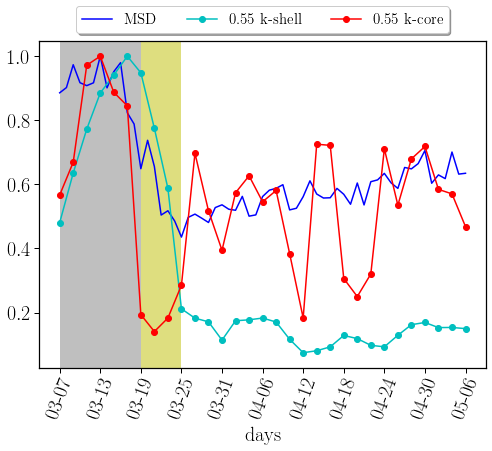

In [179]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:] for i in mrsd['date'][6:]],mrsd['rms'][6:]/np.max(mrsd['rms'][6:]),'-',label='MSD',
        color='b')
plt.plot([str(i)[5:-9] for i in week],kindex_small/np.max(kindex_small),'o-',label=f'0.55 k-shell',
        color='c')
plt.plot([str(i)[5:-9] for i in week],kindex_big/kindex_big[3],'o-',label=f'0.55 k-core',
        color='r')


plt.xlabel('days',fontsize=20,fontweight='bold')
plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13), shadow=True, ncol=3, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/main_plot.pdf',bbox_inches='tight')

plt.show()

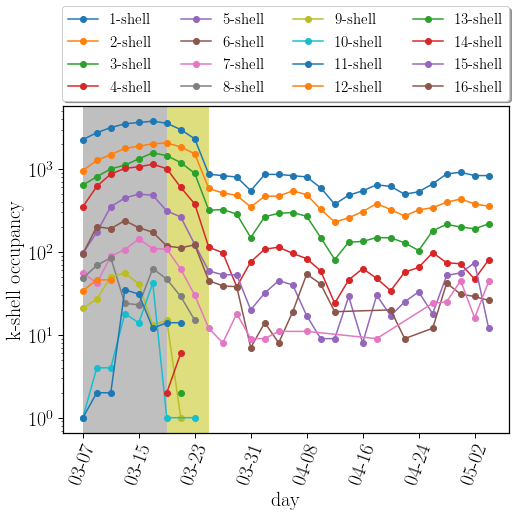

In [180]:
#kcore shells
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)
XMAX=[]
for i in np.unique(np.concatenate(kc_all)):
    #if i>10:
        x,t=[],[]
        for jj,j in enumerate(week):
            try:
                x.append(kc_all_si[jj][np.where(kc_all[jj]==i)[0][0]])
                t.append(str(j)[5:-9])
            except:
                j
                #x.append(0)
                #t.append(str(j)[5:-9])
        plt.plot(t[:-1],x[:-1],'-o',label=f'{i}-shell')
        XMAX.append(x)
        del x
####    
plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(10)),rotation=70)
plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)

plt.ylabel('k-shell occupancy',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.33), shadow=True, ncol=4, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.yscale('log')

plt.savefig(path+'plots/Occupancy.pdf',bbox_inches='tight')

plt.show()

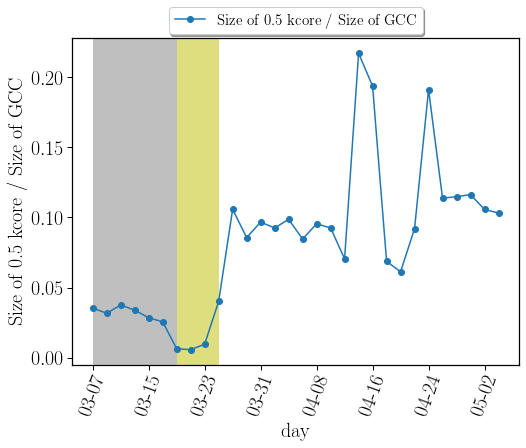

In [181]:
#plot
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

plt.plot([str(i)[5:-9] for i in week[:-1]],np.divide(kindex_big[:-1],Data[3][:-1]),'o-',label='Size of 0.5 kcore / Size of GCC')

plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)
plt.ylabel('Size of 0.5 kcore / Size of GCC',fontsize=20,fontweight='bold')

plt.xlabel('day',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(10)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/55k_core.pdf',bbox_inches='tight')

plt.show()

In [182]:
#kcoremax -3
rescaled=[]
for ii,i in enumerate(kc_all):
    idx=np.where(i==(np.max(i)))[0][0]-3
    rescaled.append(kcore_all[ii][idx])

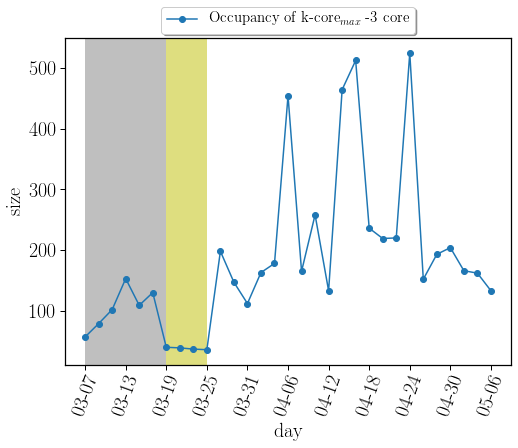

In [183]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

    
plt.plot([str(i)[5:-9] for i in week],rescaled,'o-',label='Occupancy of k-core$_{max}$ -3 core')

plt.ylabel('size',fontsize=20,fontweight='bold')
plt.xlabel('day',fontsize=20,fontweight='bold')
plt.axvspan('03-07','03-19', color='grey', alpha=0.5, lw=0)
plt.axvspan('03-19','03-25', color='y', alpha=0.5, lw=0)


plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)


plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.12), shadow=True, ncol=2, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/k_core_max-3.pdf',bbox_inches='tight')
plt.show()

# SIR

In [ ]:
#Be careful with the path
path='/home/alex/Matteo_S/CoronaVirus/Test_library/'
sir=np.load(path+'simulations_results/SIR_0__24_.npy')
g = Graph.Read_GML(path+'contact_networks/gc_24.gml')

In [ ]:
avg_sir=0
for i in sir[:-1]:
        avg_sir+=i
avg_sir=avg_sir/len(np.unique(g.coreness()))
#######################
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

for ii,i in enumerate(sir[:-1]):
    plt.plot(sir[-1],i,'-o',label=f'{int(np.unique(g.coreness())[ii])} k-shell')
plt.plot(sir[-1],avg_sir,'-o',color='k',label=f'average')

plt.ylabel('M',fontsize=20,fontweight='bold')
plt.xlabel(r'$\beta$',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.18), shadow=True, ncol=3, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/SIR_24.pdf',bbox_inches='tight')

plt.show()

In [ ]:
#Be careful with the path
path='/home/alex/Matteo_S/CoronaVirus/Test_library/'
sir=np.load(path+'simulations_results/SIR_0__2_.npy')
g = Graph.Read_GML(path+'contact_networks/gc_2.gml')

In [ ]:
avg_sir=0
for i in sir[:-1]:
        avg_sir+=i
avg_sir=avg_sir/len(np.unique(g.coreness()))
#######################
fig, ax = plt.subplots(1,1,figsize=(8,6))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)

for ii,i in enumerate(sir[:-1]):
    plt.plot(sir[-1],i,'-o',label=f'{int(np.unique(g.coreness())[ii])} k-shell')
plt.plot(sir[-1],avg_sir,'-o',color='k',label=f'average')

plt.ylabel('M',fontsize=20,fontweight='bold')
plt.xlabel(r'$\beta$',fontsize=20,fontweight='bold')

plt.xticks(ax.xaxis.set_major_locator(plt.MaxNLocator(12)),rotation=70)

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.32), shadow=True, ncol=3, prop={'size': 15})
ax.tick_params( length=5, width=1, grid_alpha=0.2)

plt.savefig(path+'plots/SIR_2.pdf',bbox_inches='tight')

plt.show()